In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import spacy
import nltk
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [100]:
import warnings
warnings.filterwarnings("ignore")

In [101]:
Real=pd.read_csv('True.csv', encoding='Latin-1',on_bad_lines='skip',engine='python')

In [102]:
Fake=pd.read_csv('/content/Fake (1).csv', encoding='Latin-1',on_bad_lines='skip',engine='python')

In [103]:
Real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21406,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21407,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21408,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21409,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [105]:
Real.shape

(21411, 4)

In [106]:
Fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23457,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23458,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23459,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23460,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [107]:
#Giving labels to both the data sets

In [108]:
Fake['Label']=0
Real['Label']=1

In [109]:
##Joining both data sets

In [110]:
news=pd.concat([Fake,Real],axis=0)

In [111]:
news

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21406,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21407,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21408,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21409,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


# EDA

In [112]:
##removing duplicates

In [113]:
news.duplicated().sum()

209

In [114]:
news.drop_duplicates(inplace=True)

In [115]:
#removing null values

In [116]:
news.isna().sum()

title      0
text       2
subject    2
date       3
Label      0
dtype: int64

In [117]:
news.dropna(inplace=True)

In [118]:
news.shape

(44661, 5)

In [119]:
## we require only text & label  column , so keeping only text & label column

In [120]:
news_text=news[['text','Label']]

In [121]:
news_text

,text,Label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21406,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21407,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21408,MINSK (Reuters) - In the shadow of disused Sov...,1
21409,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [122]:
##shuffle the data

In [123]:
news_text=news_text.sample(frac=1).reset_index()

In [124]:
news_text.head()

,index,text,Label
0,15665,BEIJING (Reuters) - China is testing a new dre...,1
1,18621,LONDON (Reuters) - Britain s ambassador to Mya...,1
2,22973,Andrew Korybko 21st Century Wire The global m...,0
3,15400,I come too faaaar DOES THIS PANDER COME WI...,0
4,7321,WASHINGTON (Reuters) - Criminal justice reform...,1


In [125]:
## removing unnecessary col

In [126]:
news_text.drop(['index'],axis=1,inplace=True)

In [127]:
news_text.head(10)

,text,Label
0,BEIJING (Reuters) - China is testing a new dre...,1
1,LONDON (Reuters) - Britain s ambassador to Mya...,1
2,Andrew Korybko 21st Century Wire The global m...,0
3,I come too faaaar DOES THIS PANDER COME WI...,0
4,WASHINGTON (Reuters) - Criminal justice reform...,1
5,DAKAR (Reuters) - Suspected Christian militias...,1
6,,0
7,Ben Carson says he s still ironing out his rol...,0
8,BRUSSELS (Reuters) - The European Union expres...,1
9,The judicial branch of our government is getti...,0


In [128]:
news_text.shape

(44661, 2)

In [129]:
##visualization

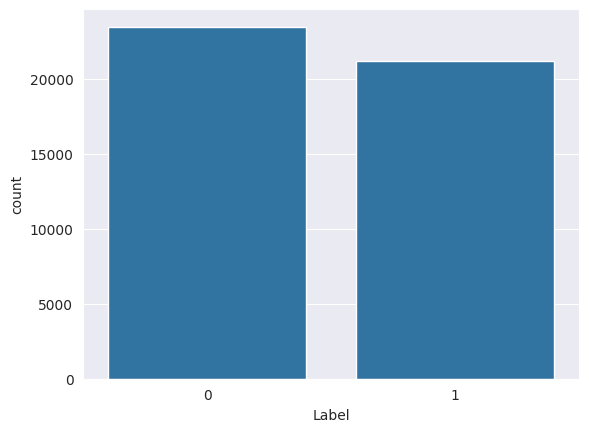

In [130]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(x ='Label', data = news_text);

In [131]:
##here we can see we have a balanced data

# DATA PREPROCESSING

In [132]:
def wordopt(text):

    #convert to lower case
    text=text.lower()

    #remove URLs
    text=re.sub(r"httml?://\S+|www.\S+",'',text)

    #remove HTML tags
    text=re.sub(r'<.*?>','',text)

    #remove Punctuations
    text=re.sub(r'[^\w\s]', '', text)

    #remove digits
    text=re.sub(r'\d', '', text)

    #remove newline character
    text=re.sub(r'\n', ' ', text)

    #remove all the special characters
    text = re.sub('[\W_]+',' ',text)

    return text



In [133]:
news_text['text']=news_text['text'].apply(wordopt)

In [134]:
news_text['text']

0        beijing reuters china is testing a new dredger...
1        london reuters britain s ambassador to myanmar...
2         andrew korybko st century wire the global med...
3         i come too faaaar does this pander come with ...
4        washington reuters criminal justice reform adv...
                               ...                        
44656    london reuters a newspaper report that british...
44657    nothing about this man surprises most of us an...
44658    colonel ralph peters comments on what he think...
44659    moscow reuters a foreignpolicy adviser to us p...
44660    washington reuters the pentagon has notified t...
Name: text, Length: 44661, dtype: object

In [135]:
#Removing stopwords,tokenizing,lemmatizing or stemming

In [136]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [137]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [138]:
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [139]:
news_text['text']=news_text['text'].apply(preprocess_text)

In [140]:
news_text

,text,Label
0,beij reuter china test new dredger ship greatl...,1
1,london reuter britain ambassador myanmar forc ...,1
2,andrew korybko st centuri wire global media aw...,0
3,come faaaar pander come fake black accent week...,0
4,washington reuter crimin justic reform advoc s...,1
...,...,...
44656,london reuter newspap report british prime min...,1
44657,noth man surpris us anymor decod obama speech ...,0
44658,colonel ralph peter comment think congress reg...,0
44659,moscow reuter foreignpolici advis us president...,1


In [141]:
##visualizing texts

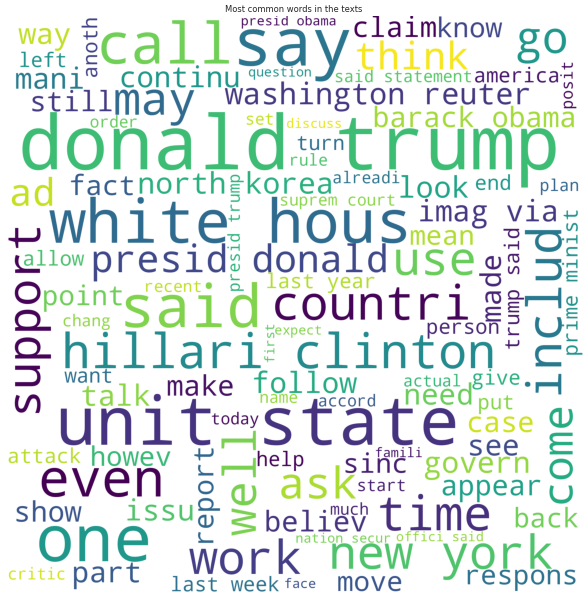

In [142]:
wordcloud = WordCloud(height=2000, width=2000,max_words=100, background_color='white')
wordcloud = wordcloud.generate(' '.join(news_text.text.tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the texts")
plt.axis('off')
plt.show()

In [143]:
## TFIDF Vectorization

In [144]:
## First let us devide data into train & test

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train = news_text['text']
y_train= news_text['Label']

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=22)

In [148]:
x_train.shape

(33495,)

In [149]:
x_test.shape

(11166,)

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [151]:
# Split the dataset into train and test sets
x = news_text['text']
y = news_text['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
x_train_v = vectorizer.fit_transform(x_train)
x_test_v = vectorizer.transform(x_test)

In [152]:
from sklearn.naive_bayes import MultinomialNB

In [153]:
#Model Training and Evaluation

In [154]:
NBModel = MultinomialNB()

In [155]:
NBModel.fit(x_train_v, y_train)

MultinomialNB()

In [156]:
y_pred=NBModel.predict(x_test_v)

In [157]:
#Evaluate the model's performance:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9352960931378036
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4705
           1       0.93      0.93      0.93      4228

    accuracy                           0.94      8933
   macro avg       0.94      0.94      0.94      8933
weighted avg       0.94      0.94      0.94      8933

Confusion Matrix:
[[4419  286]
 [ 292 3936]]


In [158]:
##Sentiment distribution

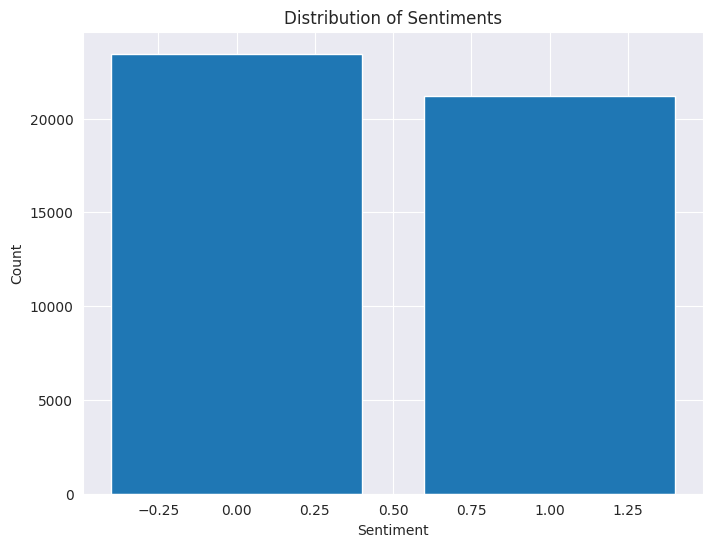

In [159]:
sentiment_countsNB = news_text['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_countsNB.index, sentiment_countsNB.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

In [160]:
##Confusion matrix

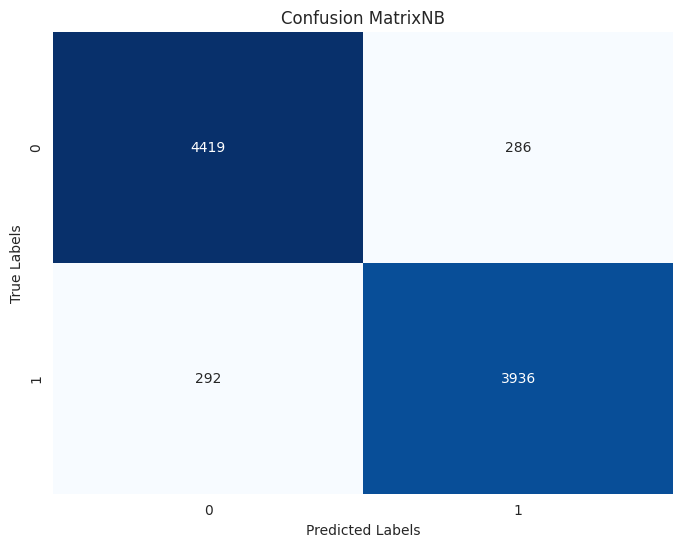

In [161]:
# Create a confusion matrix
cmNB = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmNB, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion MatrixNB')
plt.show()

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
#Creating and training the SVM model
RFModel = RandomForestClassifier(n_estimators=100, random_state=42)

In [164]:
RFModel.fit(x_train_v, y_train)

RandomForestClassifier(random_state=42)

In [165]:
y_predRF= RFModel.predict(x_test_v)

In [166]:
#Evaluate the model's performance:
accuracy = accuracy_score(y_test, y_predRF)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_predRF)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_predRF)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9897011082503079
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4705
           1       0.99      0.99      0.99      4228

    accuracy                           0.99      8933
   macro avg       0.99      0.99      0.99      8933
weighted avg       0.99      0.99      0.99      8933

Confusion Matrix:
[[4661   44]
 [  48 4180]]


In [167]:
##Sentiment distribution

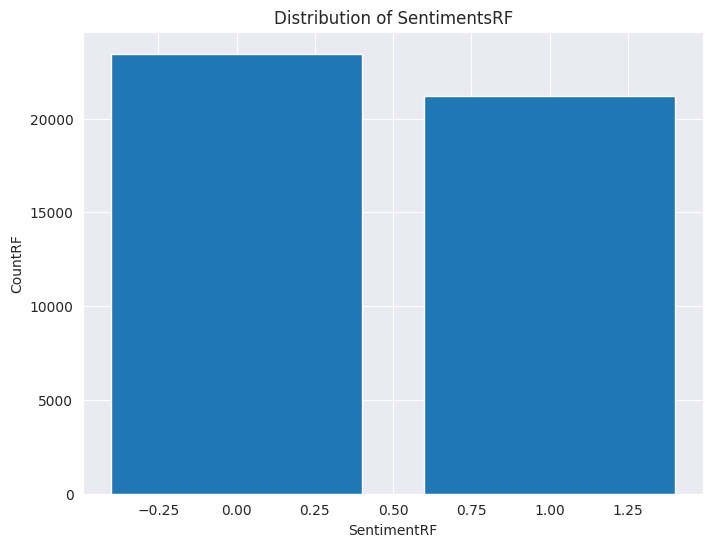

In [168]:
sentiment_countsRF = news_text['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_countsRF.index, sentiment_countsRF.values)
plt.xlabel('SentimentRF')
plt.ylabel('CountRF')
plt.title('Distribution of SentimentsRF')
plt.show()

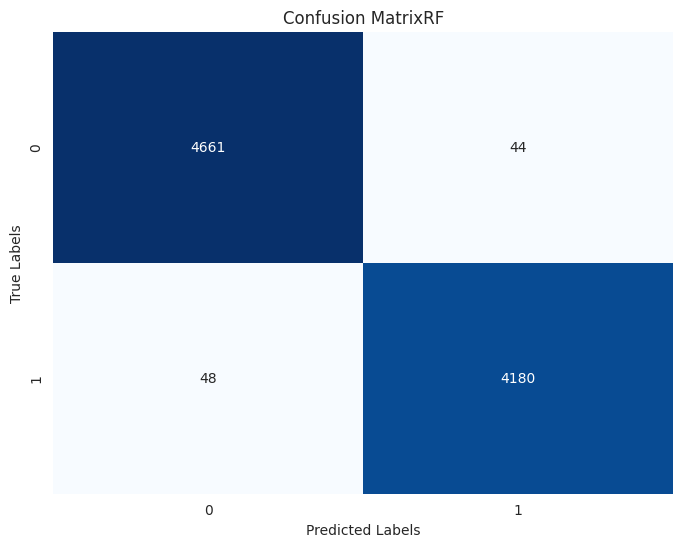

In [169]:
# Create a confusion matrix
cmRF = confusion_matrix(y_test, y_predRF)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmRF, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion MatrixRF')
plt.show()

In [170]:
from sklearn.svm import SVC

In [171]:
SVMModel = SVC(random_state=42)

In [172]:
SVMModel.fit(x_train_v, y_train)

SVC(random_state=42)

In [173]:
#Making predictions on the testing set
y_predSVC = SVMModel.predict(x_test_v)

In [174]:
#Evaluate the model's performance:
accuracy = accuracy_score(y_test, y_predSVC)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_predSVC)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_predSVC)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9951863875517744
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4705
           1       0.99      1.00      0.99      4228

    accuracy                           1.00      8933
   macro avg       1.00      1.00      1.00      8933
weighted avg       1.00      1.00      1.00      8933

Confusion Matrix:
[[4679   26]
 [  17 4211]]


In [175]:
##Sentiment distribution

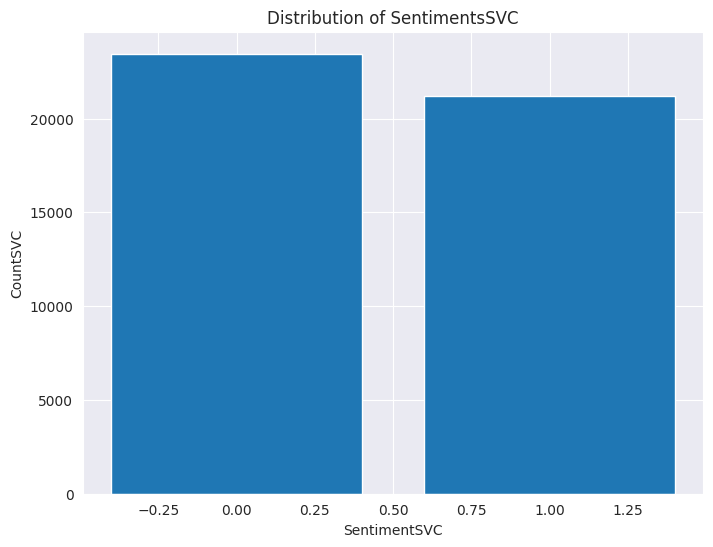

In [176]:
sentiment_countsSVC = news_text['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_countsSVC.index, sentiment_countsSVC.values)
plt.xlabel('SentimentSVC')
plt.ylabel('CountSVC')
plt.title('Distribution of SentimentsSVC')
plt.show()

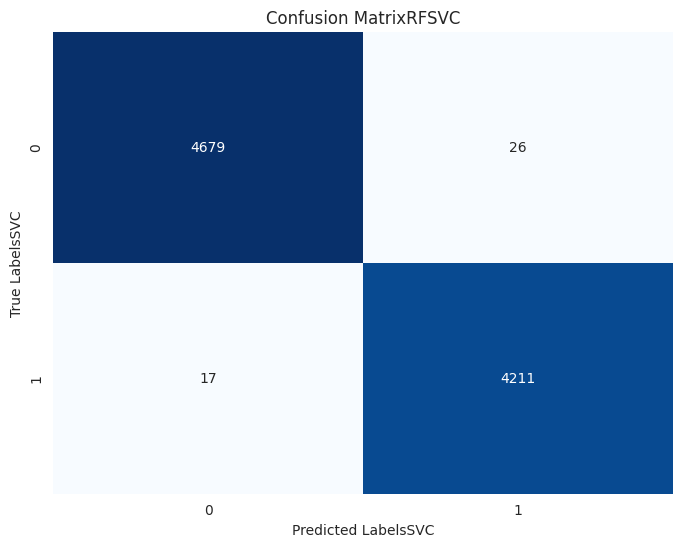

In [177]:
# Create a confusion matrix
cmSVC = confusion_matrix(y_test, y_predSVC)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmSVC, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted LabelsSVC')
plt.ylabel('True LabelsSVC')
plt.title('Confusion MatrixRFSVC')
plt.show()

In [178]:
from sklearn.feature_extraction.text import CountVectorizer

In [179]:
# Split the dataset into train and test sets
x1 = news_text['text']
y1 = news_text['Label']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorization
vectorizer = CountVectorizer()
x_train_v1 = vectorizer.fit_transform(x_train1)
x_test_v1 = vectorizer.transform(x_test1)

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
LR=LogisticRegression()

In [182]:
LR.fit(x_train_v1,y_train1)

LogisticRegression()

In [183]:
# Make predictions on the test set:
y_pred1=LR.predict(x_test_v1)

In [184]:
#Evaluate the model's performance:
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test1, y_pred1)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test1, y_pred1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9961938878316355
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4705
           1       1.00      1.00      1.00      4228

    accuracy                           1.00      8933
   macro avg       1.00      1.00      1.00      8933
weighted avg       1.00      1.00      1.00      8933

Confusion Matrix:
[[4691   14]
 [  20 4208]]


In [185]:
##Sentiment distribution

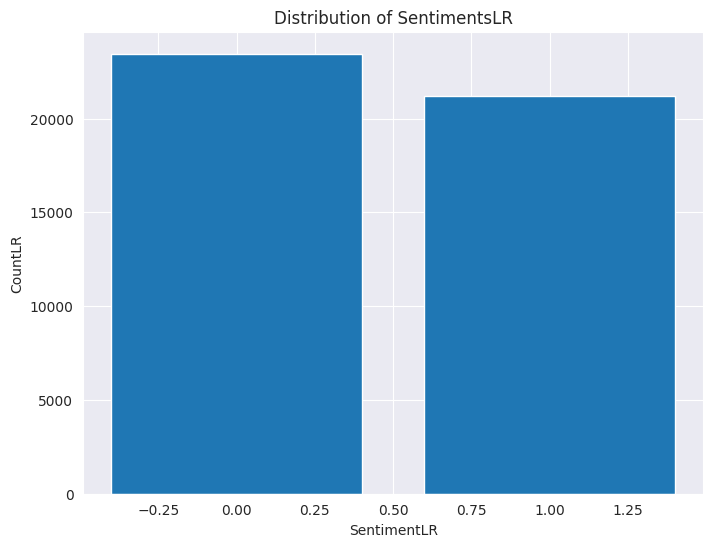

In [186]:
sentiment_countsLR = news_text['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_countsLR.index, sentiment_countsLR.values)
plt.xlabel('SentimentLR')
plt.ylabel('CountLR')
plt.title('Distribution of SentimentsLR')
plt.show()

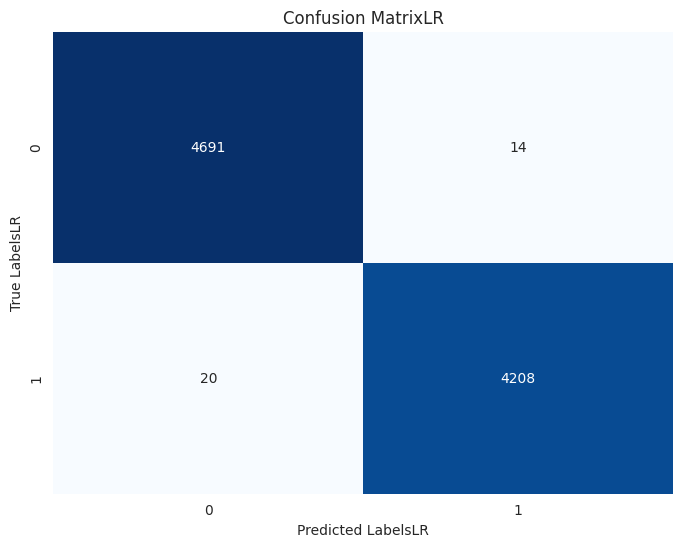

In [187]:
# Create a confusion matrix
cmLR = confusion_matrix(y_test1, y_pred1)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmLR, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted LabelsLR')
plt.ylabel('True LabelsLR')
plt.title('Confusion MatrixLR')
plt.show()

In [188]:
import pickle

In [189]:
pickle.dump(vectorizer, open('vector.pkl', 'wb'))

In [190]:
pickle.dump(LR, open('model.pkl', 'wb'))